In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(168755, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2019-10-23,56.1,60000.0,1069.518717,3535.598930,연립/다세대,31.0
1,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.0,52000.0,1155.555556,3820.018222,연립/다세대,30.0
2,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.0,50000.0,1111.111111,3673.094444,연립/다세대,31.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2020-06-01,45.0,58000.0,1288.888889,4260.789556,연립/다세대,32.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2020-06-13,45.0,57000.0,1266.666667,4187.327667,연립/다세대,32.0


In [4]:
dandok_filenames = [f for f in os.listdir('./국토교통부_실거래가_공개시스템/단독다가구매매/') if (f.endswith('.csv'))&('(매매)' in f)]
dandok_filenames

['단독다가구(매매)_실거래가_20130101_20131231.csv',
 '단독다가구(매매)_실거래가_20140101_20141231.csv',
 '단독다가구(매매)_실거래가_20150101_20151231.csv',
 '단독다가구(매매)_실거래가_20160101_20161231.csv',
 '단독다가구(매매)_실거래가_20170101_20171231.csv',
 '단독다가구(매매)_실거래가_20180101_20181231.csv',
 '단독다가구(매매)_실거래가_20190101_20191231.csv',
 '단독다가구(매매)_실거래가_20200101_20201231.csv',
 '단독다가구(매매)_실거래가_20210101_20210405.csv']

In [5]:
dfs_list = []
for f in dandok_filenames:
    df = pd.read_csv('./국토교통부_실거래가_공개시스템/단독다가구매매/' + f, encoding='euc-kr', header=15)
    if '해제사유발생일' in df.columns:
        df = df.drop(columns=['해제사유발생일'])
    dfs_list.append(df)

In [6]:
dandok_df = pd.concat(dfs_list).reset_index(drop=True)
print(dandok_df.shape)
dandok_df.head()

(109211, 11)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,서울특별시 강남구 논현동,8*,다가구,8m미만,329.78,165.4,201305,24,"177,500",1993.0,논현로138길
1,서울특별시 강남구 논현동,1**,다가구,8m미만,335.90,171.4,201312,18,"173,500",1990.0,학동로12길
2,서울특별시 강남구 논현동,7*,다가구,8m미만,435.32,177.2,201304,23,"138,000",1992.0,논현로146길
3,서울특별시 강남구 논현동,1**,다가구,8m미만,347.10,181.9,201308,28,"169,000",1991.0,선릉로135길
4,서울특별시 강남구 논현동,2**,다가구,8m미만,401.33,193.8,201305,21,"179,000",1997.0,논현로124길


In [7]:
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['거래금액(만원)'] = dandok_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
dandok_df['대지면적(㎡)'] = dandok_df['대지면적(㎡)'].apply(float)
dandok_df['단가(평)'] = dandok_df['거래금액(만원)'] / dandok_df['대지면적(㎡)'] * 3.305785

In [8]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [9]:
dandok_df['계약날짜'] = dandok_df['계약년월'].apply(lambda x: str(x)[:4]) + '-' +\
dandok_df['계약년월'].apply(lambda x: str(x)[-2:]) + '-' + dandok_df['계약일'].apply(day_modifier)

In [10]:
dandok_df['계약날짜'] = pd.to_datetime(dandok_df['계약날짜'])

In [11]:
dandok_df.drop(columns=['계약년월', '계약일'], inplace=True)

In [12]:
target = '가리봉동'
target_purpose = '2종일반'
계약일자시점 = 2018

In [13]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))&(common_df['계약날짜'].dt.year >= 계약일자시점)].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(46, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
34147,서울특별시 구로구 가리봉동,134-41,제2종일반주거지역,8m미만,2021-01-11,13.46,12500.0,928.677563,3070.008358,연립/다세대,36.0
111696,서울특별시 구로구 가리봉동,2*,제2종일반주거지역,25m미만,2021-01-26,558.00,500000.0,896.057348,2962.172939,토지,NaN
34146,서울특별시 구로구 가리봉동,134-41,제2종일반주거지역,8m미만,2020-08-06,15.12,11900.0,787.037037,2601.775231,연립/다세대,35.0
7870,서울특별시 구로구 가리봉동,1**,제2종일반주거,8m미만,2019-10-15,169.90,130000.0,765.155974,2529.441142,상업/업무,43.0
7872,서울특별시 구로구 가리봉동,8*,제2종일반주거,12m미만,2019-11-23,115.84,87500.0,755.352210,2497.032005,상업/업무,40.0


In [14]:
dandok_target_df = dandok_df[(dandok_df['동'] == target)&(dandok_df['계약날짜'].dt.year >= 계약일자시점)]
print(dandok_target_df.shape)
dandok_target_df.head()

(106, 13)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,도로명,구,동,단가(평),계약날짜
74108,서울특별시 구로구 가리봉동,1**,다가구,8m미만,135.01,78.7,37000,2006.0,디지털로23길,구로구,가리봉동,1554.181004,2018-09-13
74109,서울특별시 구로구 가리봉동,1**,다가구,8m미만,188.10,99.8,54300,1991.0,우마1길,구로구,가리봉동,1798.638532,2018-05-21
74110,서울특별시 구로구 가리봉동,1**,다가구,8m미만,165.50,102.0,53000,1994.0,우마1다길,구로구,가리봉동,1717.711814,2018-11-05
74111,서울특별시 구로구 가리봉동,2*,다가구,8m미만,254.21,114.0,63000,1980.0,구로동로5길,구로구,가리봉동,1826.881184,2018-01-25
74112,서울특별시 구로구 가리봉동,1**,다가구,8m미만,226.64,158.0,76400,1992.0,우마2나길,구로구,가리봉동,1598.493506,2018-08-25


<AxesSubplot:>

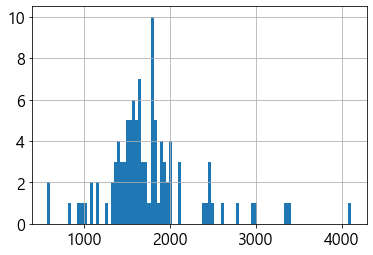

In [15]:
dandok_target_df['단가(평)'].hist(bins=100)

In [16]:
dandok_target_df['단가(평)'].quantile(0.95)

2742.708204120069

In [17]:
target_df['단가(평)'].quantile(0.90)

2463.420026422807

In [18]:
#target_df = target_df[target_df['단가(평)'] <= target_df['단가(평)'].quantile(0.9)]
target_df.shape

(46, 11)

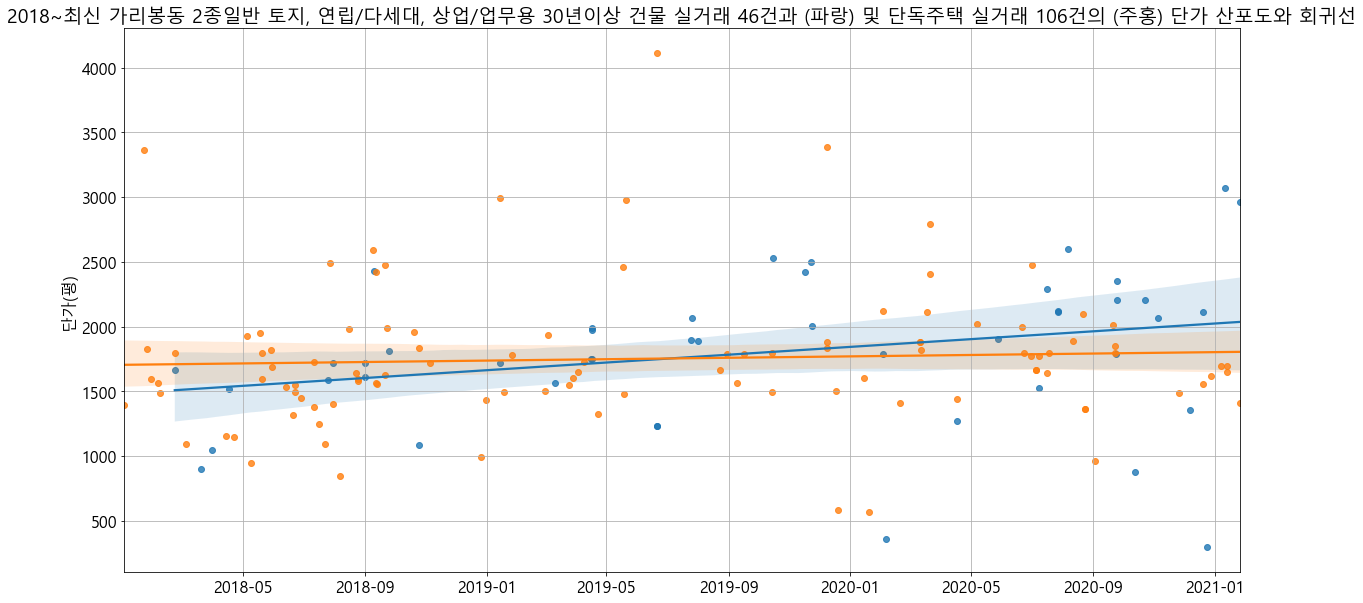

In [20]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])
ax.xaxis.update_units(dandok_target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(dandok_target_df['계약날짜']), y=dandok_target_df['단가(평)'])
plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

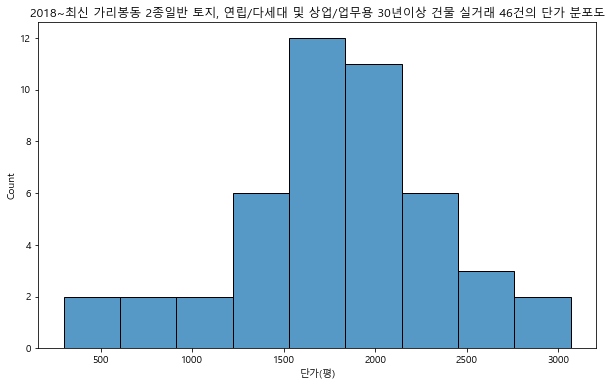

거래량: 46.0
평균: 1801.5842821541794
표준편차: 585.0105897168876
최소: 296.1509518477044
25분위: 1535.7055019616087
중간값: 1800.9641197916665
75분위: 2116.4711872093026
최대: 3070.008358098068


<Figure size 432x288 with 0 Axes>

In [21]:
font = {'size': 10}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(10,6))
plt.title('{}~최신 {} {} 토지, 연립/다세대 및 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.savefig(basedir + '{}{}/분포도.png'.format(target, target_purpose))
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])


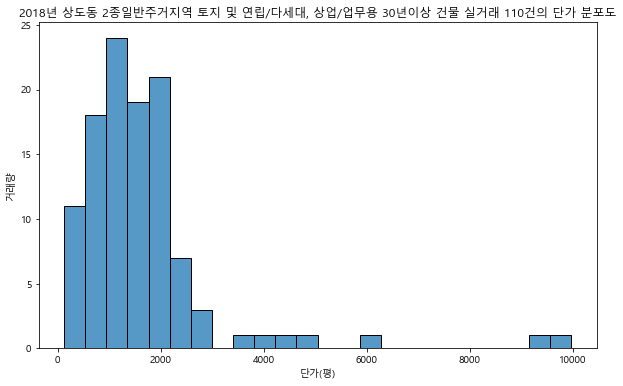

거래량: 110.0
평균: 1661.9807652524714
표준편차: 1437.7390771347605
최소: 120.21036363636364
25분위: 935.7083746335334
중간값: 1361.205588235294
75분위: 1933.425044705971
최대: 9971.479943324935


<Figure size 432x288 with 0 Axes>

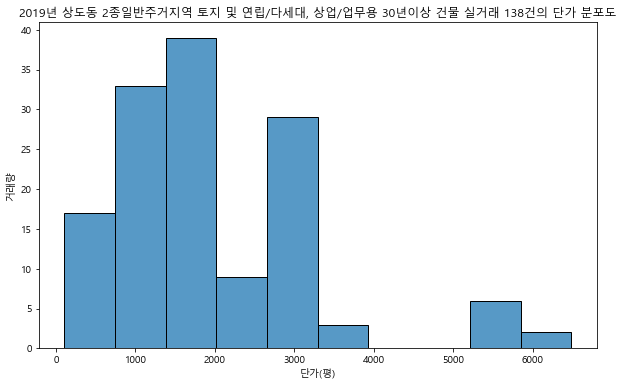

거래량: 138.0
평균: 1937.3374333480049
표준편차: 1296.410694472433
최소: 102.85578718108276
25분위: 1029.8956007233098
중간값: 1753.5470573727935
75분위: 2721.4752275936385
최대: 6484.424423076924


<Figure size 432x288 with 0 Axes>

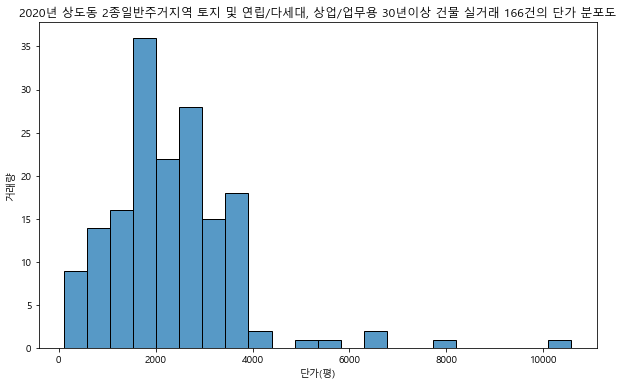

거래량: 166.0
평균: 2354.423689558845
표준편차: 1380.2681105701088
최소: 105.81077109602327
25분위: 1603.7766107593052
중간값: 2121.2409889959135
75분위: 2941.3004033353195
최대: 10578.512


<Figure size 432x288 with 0 Axes>

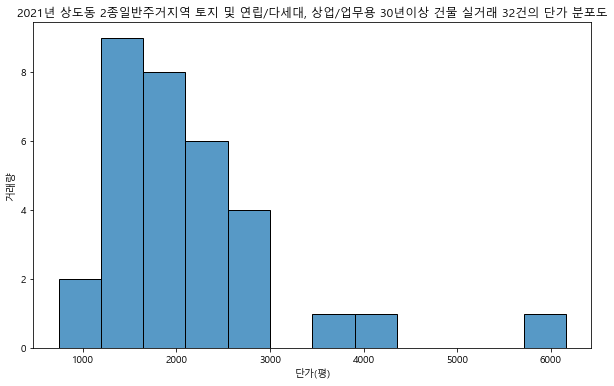

거래량: 32.0
평균: 2126.647814618734
표준편차: 1010.8098701762747
최소: 740.9518103448277
25분위: 1565.4839368564317
중간값: 1993.4963417351796
75분위: 2309.785106124472
최대: 6161.371431689219


<Figure size 432x288 with 0 Axes>

In [21]:
for year in sorted(target_df['계약날짜'].dt.year.unique()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.savefig(basedir + '{}{}/{}분포도.png'.format(target, target_purpose, year))
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [22]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)

In [23]:
target_df.head(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 동작구 상도동,1**,제2종일반주거지역,8m미만,2020-12-10,4.50,14400.0,3200.000000,10578.512000,토지,NaN
1,서울특별시 동작구 상도동,산6*,제2종일반주거지역,12m미만,2018-11-16,3.97,11975.0,3016.372796,9971.479943,토지,NaN
2,서울특별시 동작구 상도동,산6*,제2종일반주거지역,8m미만,2018-11-16,1.59,4485.0,2820.754717,9324.808632,토지,NaN
3,서울특별시 동작구 상도동,1**,제2종일반주거지역,8m미만,2020-07-07,15.00,36000.0,2400.000000,7933.884000,토지,NaN
4,서울특별시 동작구 상도동,221-1,제2종일반주거지역,25m미만,2020-04-17,22.91,46000.0,2007.856831,6637.542994,연립/다세대,36.0
5,서울특별시 동작구 상도동,1**,제2종일반주거,8m미만,2020-08-10,76.00,149435.0,1966.250000,6499.999756,상업/업무,54.0
6,서울특별시 동작구 상도동,산6*,제2종일반주거지역,12m미만,2019-06-08,2.86,5610.0,1961.538462,6484.424423,토지,NaN
7,서울특별시 동작구 상도동,221-1,제2종일반주거지역,25m미만,2021-01-06,22.91,42700.0,1863.814928,6161.371432,연립/다세대,37.0
8,서울특별시 동작구 상도동,산6*,제2종일반주거지역,12m미만,2019-06-08,56.69,104550.0,1844.240607,6096.662934,토지,NaN
9,서울특별시 동작구 상도동,2**,제2종일반주거지역,8m미만,2018-11-29,2.03,3710.0,1827.586207,6041.607069,토지,NaN


In [24]:
target_df.tail(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
426,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2018-12-11,99.00,4500.0,45.454545,150.262955,토지,NaN
427,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2018-09-10,99.04,4500.0,45.436187,150.202267,토지,NaN
428,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2019-12-01,94.25,4000.0,42.440318,140.298568,토지,NaN
429,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2019-12-01,43.00,1800.0,41.860465,138.381698,토지,NaN
430,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2020-03-04,99.20,3850.0,38.810484,128.299115,토지,NaN
431,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2019-05-10,33.06,1260.0,38.112523,125.991806,토지,NaN
432,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2019-04-25,32.99,1200.0,36.374659,120.246802,토지,NaN
433,서울특별시 동작구 상도동,3**,제2종일반주거지역,-,2018-02-08,2.75,100.0,36.363636,120.210364,토지,NaN
434,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2020-09-10,99.04,3600.0,36.348950,120.161813,토지,NaN
435,서울특별시 동작구 상도동,2**,제2종일반주거지역,-,2019-05-10,99.80,3624.0,36.312625,120.041732,토지,NaN


In [25]:
target_df.to_excel('./국토교통부_실거래가_공개시스템/땅값분석/{}{}/{}_{}_땅값분석.xlsx'.format(target, target_purpose, target, target_purpose), index=False)